<a href="https://colab.research.google.com/github/angel4sara/ICT_Exist_Test/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

##Importing the essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Importing the traing and testing data

In [3]:
data_test = pd.read_csv('/content/test_Vges7qu.csv')
data_train = pd.read_csv('/content/train.csv')

##Exploratory Data Analysis (EDA)

In [4]:
data_test.head() #frist 5 rows of test dataset

,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
data_train.head() #frist 5 rows of train dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data_train.shape #to understand the number of rows and column

(550068, 12)



*   550068 rows
*  12 columns



In [7]:
data_train.info() #to understand the datatypes and if any value is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


*   Datatypes are integer, float and object.



In [8]:
print(data_train.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


- Missing values was present
in Product_Category_2 and
Product_Category_3

In [9]:
data_train.describe() #To understand the statistical description of the dataset

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


- The Statistical Description of the Dataset

## Visualisations

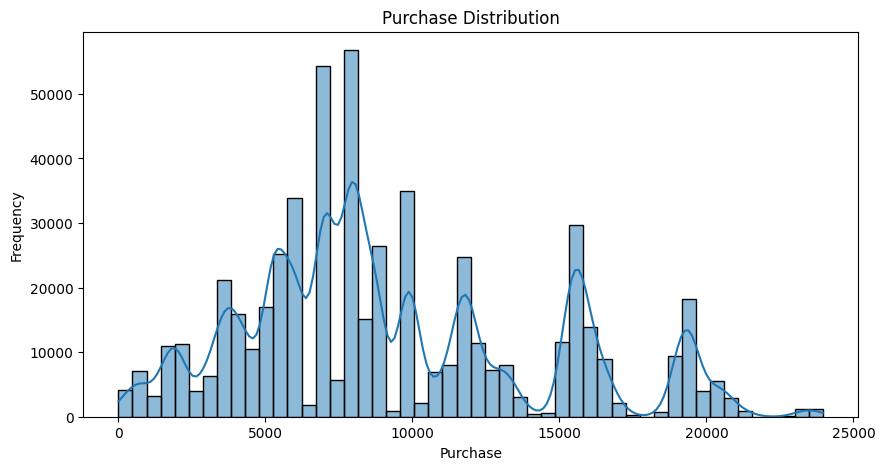

In [10]:
#Purchase ditribution
plt.figure(figsize=(10, 5))
sns.histplot(data_train["Purchase"], bins=50, kde=True)
plt.title("Purchase Distribution")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.show()

1. The plot is right-skewed, with peaks every few thousand.

2. Most purchases fall in the Rs. 5,000 to Rs. 15,000 range.

3. Very few purchases are close to ₹0 or above Rs. 20,000.

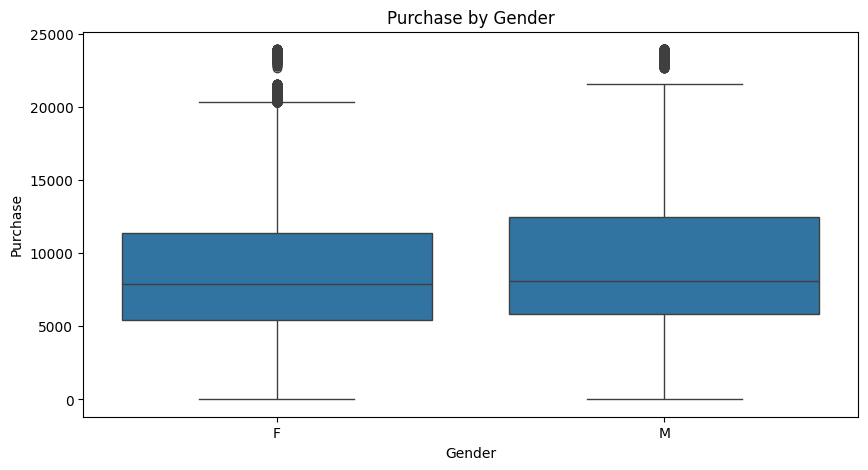

In [11]:
#Gender vs Purcharse
plt.figure(figsize=(10, 5))
sns.boxplot(data_train, x="Gender", y="Purchase")
plt.title("Purchase by Gender")
plt.show()

1. Median purchase is slightly higher for males.

2. Males show greater variability and more high-end purchases.

3. Both genders show similar outliers in the Rs. 20,000- 25,000 range.

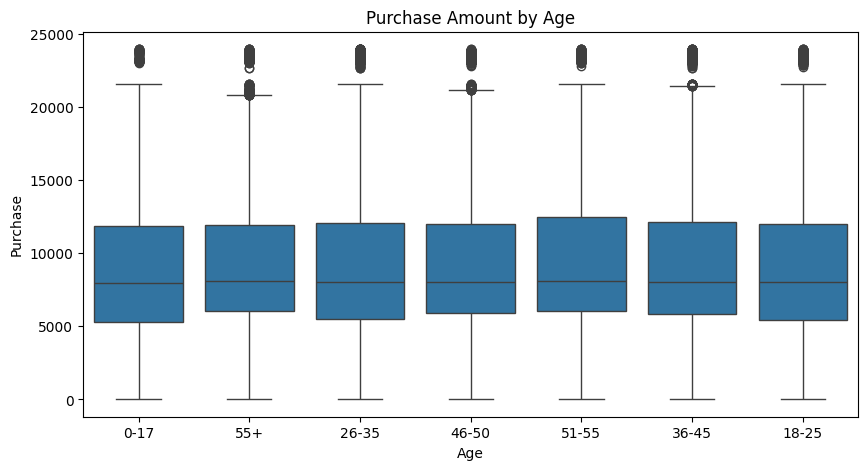

In [12]:
# Age vs Purchase
plt.figure(figsize=(10, 5))
sns.boxplot(data_train, x="Age", y="Purchase")
plt.title("Purchase Amount by Age")
plt.show()

1. Median purchases are fairly consistent across all age groups.

2. Outliers exists in every group.

3. Slightly wider spread in middle-aged segments (36-45, 46-50), indicating more varied spending.

## Preprocessing

###LabelEncoding

In [13]:
# For consistency, combine train and test
data_train["source"] = "train"
data_test["source"] = "test"
combined = pd.concat([data_train, data_test], ignore_index=True)


# Gender: F to 0, M to 1
gender_encoder = LabelEncoder()
combined["Gender"] = gender_encoder.fit_transform(combined["Gender"])

# City_Category: A/B/C to 0/1/2
city_encoder = LabelEncoder()
combined["City_Category"] = city_encoder.fit_transform(combined["City_Category"])

# User_ID and Product_ID: convert to numeric codes
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

combined["User_ID"] = user_encoder.fit_transform(combined["User_ID"])
combined["Product_ID"] = product_encoder.fit_transform(combined["Product_ID"])

# Optional: Frequency encoding
combined["User_ID_freq"] = combined["User_ID"].map(combined["User_ID"].value_counts())
combined["Product_ID_freq"] = combined["Product_ID"].map(combined["Product_ID"].value_counts())



### Manual Mapping

We used manual mapping (.map()) because to avoid the default behavior of LabelEncoder, which just assigns numbers based on sorted labels

In [14]:
# Age: ordered bins to  ordinal codes
age_order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]
combined["Age"] = pd.Categorical(combined["Age"], categories=age_order, ordered=True).codes

# Stay_In_Current_City_Years: convert '4+' to 4
combined["Stay_In_Current_City_Years"] = combined["Stay_In_Current_City_Years"].str.replace("+", "", regex=False).astype(int)

# Product_Category_2 and Product_Category_3: fill missing with -1
combined["Product_Category_2"] = combined["Product_Category_2"].fillna(-1).astype(int)
combined["Product_Category_3"] = combined["Product_Category_3"].fillna(-1).astype(int)


In [15]:
data_train_clean = combined[combined["source"] == "train"].drop(columns=["source"])
data_test_clean = combined[combined["source"] == "test"].drop(columns=["source", "Purchase"], errors="ignore")

### Train-Test Split

In [16]:
# Define features and target
X = data_train_clean.drop(columns=["Purchase"])
y = data_train_clean["Purchase"]

# Split into train/validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Double-check for missing values
print(X_train.isnull().sum())

# Fill any remaining NaNs with -1 (or you can use median or 0)
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Comb                          440054
User_ID_freq                       0
Product_ID_freq                    0
dtype: int64


/tmp/ipython-input-567993735.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(-1)
/tmp/ipython-input-567993735.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val = X_val.fillna(-1)


In [20]:
# Drop the column if it exists
if "Comb" in X_train.columns:
    X_train = X_train.drop(columns=["Comb"])
    X_val = X_val.drop(columns=["Comb"])



In [21]:
if "Comb" in data_test_clean.columns:
    data_test_clean = data_test_clean.drop(columns=["Comb"])


In [33]:
#models
models = {
    "LinearRegression": LinearRegression(),
    #"RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    #"GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=300, learning_rate=0.08, random_state=42),
}

The Random Forest and Gradient Boosting models are taking a long time to run (above 4 mins) so I chose not to run them and instead tries the XGBoost and LightGBM

In [34]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models["XGBoost"] = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
models["LightGBM"] = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [35]:
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

LinearRegression RMSE: 4488.38
HistGradientBoosting RMSE: 2639.34
XGBoost RMSE: 2698.34
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 13
[LightGBM] [Info] Start training from score 9266.733955
LightGBM RMSE: 2707.29


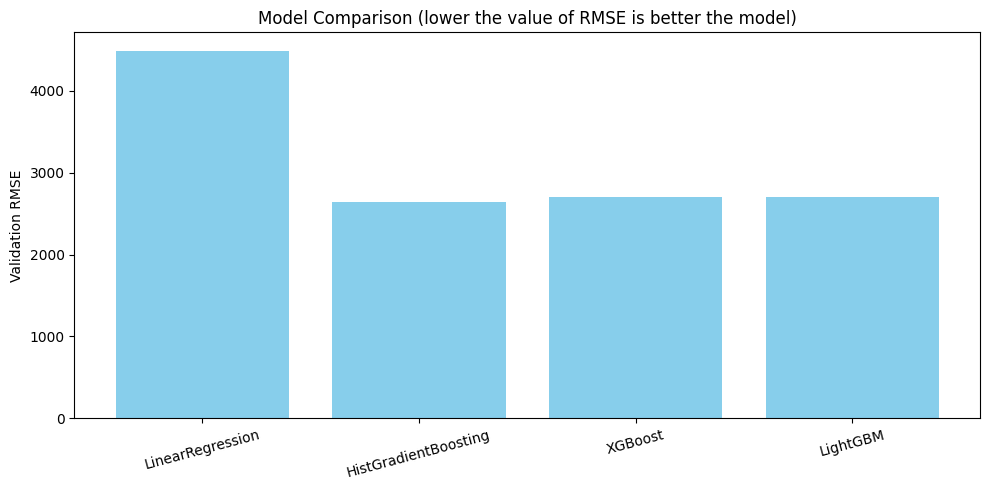

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Validation RMSE")
plt.title("Model Comparison (lower the value of RMSE is better the model)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [37]:
best_model_name = min(results, key=results.get)
print(f"\n Best model: {best_model_name} with RMSE = {results[best_model_name]:.2f}")



 Best model: HistGradientBoosting with RMSE = 2639.34


HistGradientBoosting is the best model among the chosen models with lowest RMSE value.

##Prediction

In [42]:
#  Predicting on test data
best_model = models[best_model_name]
test_preds = best_model.predict(data_test_clean)
test_preds = np.clip(test_preds, 0, None)  # Ensure no negative values

Saving the file in the given format

In [43]:
# Load sample submission format
sample = pd.read_csv("sample_submission_V9Inaty.csv")

# Assign predictions to the correct column
sample["Purchase"] = test_preds

# Save final submission file
sample.to_csv("black_friday_submission.csv", index=False)

print("Submission saved as 'black_friday_submission.csv'")

Submission saved as 'black_friday_submission.csv'
